<a href="https://colab.research.google.com/github/Dhruvj4321/Dog-and-Cat-classifier/blob/main/CatAndDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/CanAndDog/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
import os
cats_dir1 = '/content/training_set/training_set/cats'
dogs_dir2 = '/content/training_set/training_set/dogs'

filenames1 = os.listdir(cats_dir1)
filenames2 = os.listdir(dogs_dir2)

all_filenames = filenames1 + filenames2
categories = []
for filename in all_filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')


In [ ]:
final_ds = pd.DataFrame({'Filename':all_filenames, 'classname':categories})

In [ ]:
final_ds.head()

,Filename,classname
0,cat.1185.jpg,cat
1,cat.1191.jpg,cat
2,cat.2338.jpg,cat
3,cat.3492.jpg,cat
4,cat.664.jpg,cat


In [ ]:
final_ds.tail()

,Filename,classname
8002,dog.3510.jpg,dog
8003,dog.1561.jpg,dog
8004,dog.940.jpg,dog
8005,dog.628.jpg,dog
8006,dog.2814.jpg,dog


In [ ]:
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

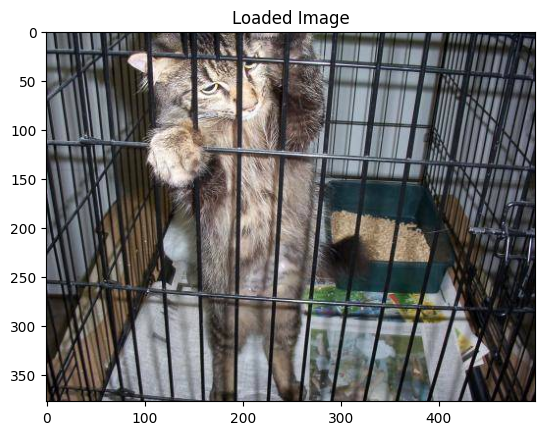

In [ ]:
sample = random.choice(all_filenames)
directory1 = '/content/training_set/training_set/cats'
directory2 = '/content/training_set/training_set/dogs'

# Assuming the sample can be from either directory
if sample.startswith('cat'):
    image_path = os.path.join(directory1, sample)
else:
    image_path = os.path.join(directory2, sample)

img = load_img(image_path)

# Display the loaded image
plt.imshow(img)
plt.title('Loaded Image')
plt.show()

In [ ]:
# Define our image sizes
IMAGE_HEIGHT = 60
IMAGE_WIDTH = 60
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)
IMAGE_CHANNELS = 3

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Building the model

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
training_df, valid_df = train_test_split(final_ds, test_size=0.20, random_state=7)
training_df = training_df.reset_index(drop='true')
valid_df = valid_df.reset_index(drop='true')

In [ ]:
training_df.head()

,Filename,classname
0,cat.3474.jpg,cat
1,dog.3204.jpg,dog
2,cat.1988.jpg,cat
3,cat.2569.jpg,cat
4,dog.1525.jpg,dog


In [ ]:
valid_df.head()

,Filename,classname
0,dog.2444.jpg,dog
1,dog.296.jpg,dog
2,dog.1478.jpg,dog
3,cat.3126.jpg,cat
4,cat.544.jpg,cat


#Create our training data generator

In [ ]:
cats_dir1 = '/content/training_set/training_set/cats'
dogs_dir2 = '/content/training_set/training_set/dogs'

filenames1 = os.listdir(cats_dir1)
filenames2 = os.listdir(dogs_dir2)

all_filenames = filenames1 + filenames2

name = []

for names in all_filenames:
  name.append(names)



In [ ]:
import shutil

# Define the source directories
cats_dir = '/content/training_set/training_set/cats'
dogs_dir = '/content/training_set/training_set/dogs'

# Define the main directory where you want to merge them
merged_main_dir = '/content/merged_training_set'

# Create the main directory if it doesn't exist
if not os.path.exists(merged_main_dir):
    os.makedirs(merged_main_dir)

# Merge the contents of cats_dir and dogs_dir into merged_main_dir
for src_dir in [cats_dir, dogs_dir]:
    for filename in os.listdir(src_dir):
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(merged_main_dir, filename)

        # Copy the file from src_path to dst_path
        shutil.copy(src_path, dst_path)

print("Directories merged successfully!")

Directories merged successfully!


In [ ]:
batch_size = 32

training_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    training_df,
    '/content/merged_training_set',
    x_col = 'Filename',
    y_col = 'classname',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 6403 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_generator = training_datagen.flow_from_dataframe(
    valid_df,
    '/content/merged_training_set',
    x_col = 'Filename',
    y_col = 'classname',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1602 validated image filenames belonging to 2 classes.


In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = valid_generator,
    validation_steps = 1601//batch_size,
    steps_per_epoch = 6404//batch_size
)

Epoch 1/10
200/200 [==============================] - 39s 186ms/step - loss: 0.6786 - accuracy: 0.5634 - val_loss: 0.6274 - val_accuracy: 0.6350
Epoch 2/10
200/200 [==============================] - 37s 180ms/step - loss: 0.6033 - accuracy: 0.6728 - val_loss: 0.5904 - val_accuracy: 0.6850
Epoch 3/10
200/200 [==============================] - 35s 173ms/step - loss: 0.5415 - accuracy: 0.7283 - val_loss: 0.5574 - val_accuracy: 0.7106
Epoch 4/10
200/200 [==============================] - 43s 217ms/step - loss: 0.4952 - accuracy: 0.7607 - val_loss: 0.5434 - val_accuracy: 0.7331
Epoch 5/10
200/200 [==============================] - 36s 179ms/step - loss: 0.4529 - accuracy: 0.7855 - val_loss: 0.5358 - val_accuracy: 0.7300
Epoch 6/10
200/200 [==============================] - 39s 195ms/step - loss: 0.4197 - accuracy: 0.8038 - val_loss: 0.5053 - val_accuracy: 0.7600
Epoch 7/10
200/200 [==============================] - 33s 164ms/step - loss: 0.3615 - accuracy: 0.8395 - val_loss: 0.5597 - val_ac

In [ ]:
model.save_weights('cat_dog_10_epochs.h5')

In [ ]:
predict = model.predict_generator(valid_generator, steps = np.ceil(1601/batch_size))

<ipython-input-42-6e563dee0454>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(valid_generator, steps = np.ceil(1601/batch_size))


In [ ]:
predict

array([[0.49700204, 0.502998  ],
       [0.99003804, 0.00996202],
       [0.29168114, 0.7083189 ],
       ...,
       [0.9909795 , 0.00902053],
       [0.00820952, 0.99179035],
       [0.02872692, 0.9712731 ]], dtype=float32)